<h3>ImplementQuantumCircuit of Grover;s algorithm</h3>
<h4>Step-by-Step Implementation</h4>
<b>Create the Quantum Circuit:</b> Set up a quantum circuit with 3 qubits (to represent 8 possible states) and 3 classical bits for measurement.<br/>
<b>Initialize the Qubits:</b> Prepare the qubits in a uniform superposition state.<br/>
<b>Define the Oracle:</b> Create an Oracle function that marks the target state.<br/>
<b>Define the Diffusion Operator:</b> Create a function for the diffusion operator.<br/>
<b>Execute the Circuit: </b>Run the circuit and measure the output.<br/>

Result counts: {'100': 122, '001': 147, '010': 107, '111': 124, '000': 131, '011': 144, '110': 128, '101': 121}


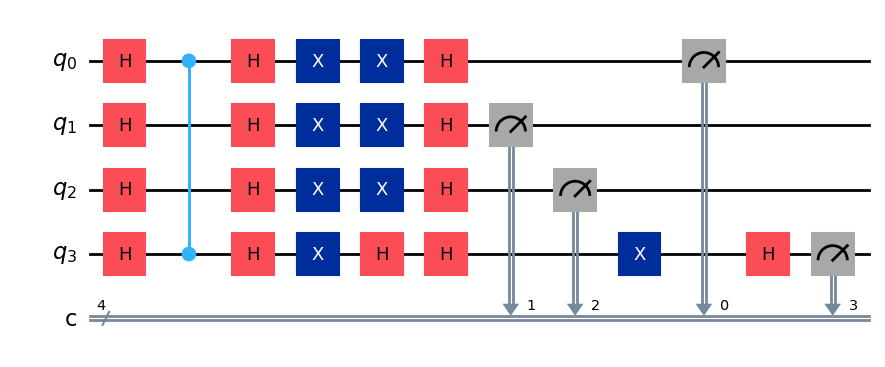

In [5]:
# Import required libraries
from qiskit import QuantumCircuit,transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np

# Define a function for the Oracle
def oracle(circuit, n):
    """Oracle that flips the phase of the state corresponding to the correct solution."""
    circuit.cz(0, n-1)  # Mark state |11...1> as the solution
    return circuit

# Define a function for the Diffusion operator (Grover diffusion operator)
def diffusion_operator(circuit, n):
    """Diffusion operator (also known as amplitude amplification)."""
    circuit.h(range(n))               # Apply Hadamard to all qubits
    circuit.x(range(n))               # Apply X-gates (flip 0 -> 1 and 1 -> 0)
    
    circuit.h(n-1)                    # Apply H-gate to the last qubit
    #circuit.mct(list(range(n-1)), n-1)  # Multi-controlled Toffoli (control on first n-1 qubits, target n-th qubit)
    circuit.h(n-1)                    # Apply H-gate to the last qubit again

    circuit.x(range(n))               # Apply X-gates (flip back)
    circuit.h(range(n))               # Apply Hadamard gates again
    return circuit

# Define Grover's algorithm function
def grovers_algorithm(n, num_iterations):
    """Implements Grover's algorithm for an n-qubit quantum circuit."""
    # Create a quantum circuit with n qubits and n classical bits
    circuit = QuantumCircuit(n, n)

    # Step 1: Apply Hadamard gates to all qubits to create superposition
    circuit.h(range(n))

    # Repeat Oracle and Diffusion operator for the specified number of iterations
    for _ in range(num_iterations):
        # Step 2: Apply Oracle (marks the correct state)
        circuit = oracle(circuit, n)

        # Step 3: Apply Diffusion Operator (amplitude amplification)
        circuit = diffusion_operator(circuit, n)

    # Step 4: Measure the qubits
    circuit.measure(range(n), range(n))

    # Execute the circuit on a simulator
    simulator = Aer.get_backend('qasm_simulator')
    # result = execute(circuit, backend=simulator, shots=1024).result()

        # For execution
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    #counts = result.get_counts()


    # Get the result counts and return them
    counts = result.get_counts()
    return counts, circuit

# Run Grover's algorithm for a 3-qubit system
n_qubits = 4
iterations = 1  # Typically O(sqrt(N)) iterations
result_counts, grover_circuit = grovers_algorithm(n_qubits, iterations)

# Show results
print("Result counts:", result_counts)
grover_circuit.draw(output='mpl')  # Display the quantum circuit diagram
